Use the dataset: https://www.tensorflow.org/datasets/catalog/citrus_leaves 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import keras

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split

Split it into a training set, and a test set and Preprocess data

In [2]:
# Using Image data generator for data augmentation and to save memory.
idg_train = IDG(
    rescale=1./ 255,
    rotation_range=180,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.25)

idg_test = IDG(rescale=1./ 255)

ds_train=idg_train.flow_from_directory(r'C:\Users\janah\Desktop\ML - 257\Assignments\HW11\Citrus\train',batch_size=32,shuffle=True,subset='training')
ds_valid=idg_train.flow_from_directory(r'C:\Users\janah\Desktop\ML - 257\Assignments\HW11\Citrus\train',batch_size=8,shuffle=True,subset='validation')
ds_test=idg_test.flow_from_directory(r'C:\Users\janah\Desktop\ML - 257\Assignments\HW11\Citrus\test',batch_size=1,shuffle=True)

Found 358 images belonging to 4 classes.
Found 117 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


Build CNN Model and comment on the results

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers as rg
from tensorflow.keras import initializers as it

model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3),padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)      

In [17]:
# Used Adam as optimizer, Categorical Cross Entropy as Loss and Hyper Parameters - Learning Rate - 0.0001

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=35
 )

Epoch 1/35
12/12 [==============================] - 35s 3s/step - loss: 1.3423 - accuracy: 0.3240 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3018 - val_accuracy: 0.3419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/35
12/12 [==============================] - 28s 2s/step - loss: 1.3047 - accuracy: 0.3966 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2914 - val_accuracy: 0.2991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/35
12/12 [==============================] - 28s 2s/step - loss: 1.2766 - accuracy: 0.4050 - precision: 1.0000 - recall: 0.0028 - val_loss: 1.2763 - val_accuracy: 0.3504 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/35
12/12 [==============================] - 28s 2s/step - loss: 1.2466 - accuracy: 0.3994 - precision: 0.8333 - recall: 0.0140 - val_loss: 1.2204 - val_accuracy: 0.4188 - val_precision: 1.0000 - val_recall: 0.0085
Epoch 5/35
12/12 [==============================] - 28s 2s/step - loss: 

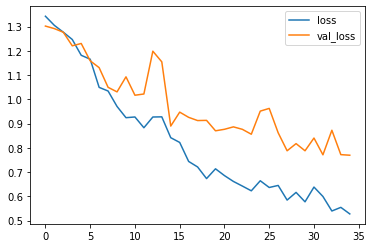

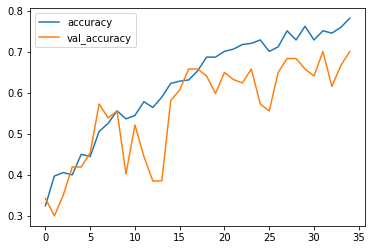

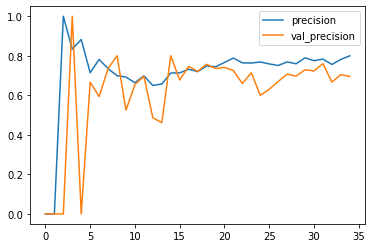

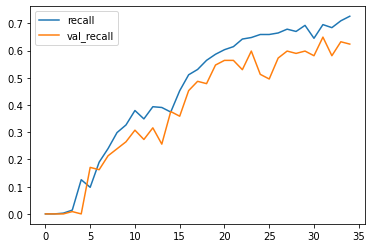

In [18]:
# Plotting the Graphs for Loss, Accuracy, Precision, Recall
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

In [19]:
model.evaluate(ds_train)

12/12 [==============================] - 8s 646ms/step - loss: 0.5570 - accuracy: 0.7682 - precision: 0.7818 - recall: 0.7207


[0.5569994449615479,
 0.7681564092636108,
 0.7818182110786438,
 0.7206704020500183]

In [20]:
model.evaluate(ds_test)

121/121 [==============================] - 3s 25ms/step - loss: 1.1510 - accuracy: 0.5868 - precision: 0.6481 - recall: 0.5785


[1.150961995124817, 0.586776852607727, 0.6481481194496155, 0.5785123705863953]

Observations:
- From model evaluation we can see the accuracy for train is 0.76 and test is 0.58
- So, there clearly seems to be overfitting but it is acceptable as we had only 598 samples which is low for trainning a CNN for image classification.

Challenges faced in training the model

 - Tried to load the data directly from the official site but at first there was an url Downloaderror. Had to update the tfds library.
 - Only Train split was available on the official site, could not get the data like that of Demo.
 - Also the RGB lists of the image column were not supported for training as they were not in sequence.
 - Encountered ValueError while training as the model could not convert numpy array to Tensor.

If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem? 

 - We use 16 bit floats instead of 32 bit floats
 - Distributing CNN on multiple devices
 - Remove one or more layers
 - Reduce the size of mini-lot
 - Reduce dimensionality by using a larger stride in one or more layers.

What are the advantages of a CNN over a fully connected DNN for image classification? 

 - CNN's layers are only partially connnected and reuses its weights.
 - Learned a kernel which can detect a particular features.
 - A CNN's architecture embeds knowledge of neighbouring pixels.
 - Fewer Parameters, Which means faster to train.